[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Pricing_Seguros_con_RedesNeuronales/blob/main/notebooks/EstadisticosDescriptiviso_y_Poisson_Seguros.ipynb)

# Las secciones tienen texto de idea general, agregare todos los comentarios

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Los datos vienen del siguiente sitio: https://challengedata.ens.fr/participants/challenges/161/

# Carga de datos y preproceso.

In [ ]:
train_input = pd.read_csv('/content/drive/MyDrive/Cruso-ApsFinancieras/train_input_Z61KlZo.csv', low_memory=False)
train_output = pd.read_csv('/content/drive/MyDrive/Cruso-ApsFinancieras/train_output_DzPxaPY.csv', low_memory=False)
#test_input = pd.read_csv('/content/drive/MyDrive/Cruso-ApsFinancieras/test_input_5qJzHrr.csv', low_memory=False)

Podemos tener un vistazo del DataFrame, en el que podemos ver a grandes rasgos sus datos y tamaño.

In [ ]:
train_input

,ID,ACTIVIT2,VOCATION,TYPERS,ANCIENNETE,ADOSS,CARACT1,CARACT2,CARACT3,INDEM1,...,NBJRR100_MMAX_A,NBJRR100_MSOM_A,RR_VOR_MM_A,RR_VOR_MMAX_A,RRAB_VOR_MM_A,RRAB_VOR_MMAX_A,ANNEE_ASSURANCE,ESPINSEE,AN_EXERC,ZONE
0,1,ACT1,VOC6,1,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,ANNEE5,3
1,2,ACT1,VOC6,1,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,ANNEE5,3
2,3,ACT1,VOC6,1,2,N,R,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,0.402740,NaN,ANNEE5,3
3,4,ACT1,VOC6,2,0,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,0.246575,NaN,ANNEE5,3
4,5,ACT1,VOC6,2,1,N,N,NaN,NaN,N,...,01. <= 0,01. <= 0,03. <= 102,03. <= 232,04. >= 25,02. <= 57,0.838356,NaN,ANNEE5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383605,383606,ACT5,VOC6,2,5,N,N,NaN,NaN,N,...,01. <= 0,01. <= 0,01. <= 63,01. <= 137,02. <= 19,01. <= 41,1.000000,ESP1,ANNEE6,95
383606,383607,ACT5,VOC6,2,11,N,N,NaN,NaN,N,...,01. <= 0,01. <= 0,01. <= 63,01. <= 137,02. <= 19,01. <= 41,1.000000,ESP1,ANNEE6,95
383607,383608,ACT1,VOC6,1,10,N,N,NaN,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,ESP3,ANNEE6,95
383608,383609,ACT1,VOC6,2,0,N,N,NaN,NaN,N,...,01. <= 0,01. <= 0,02. <= 79,02. <= 176,02. <= 19,01. <= 41,1.000000,ESP1,ANNEE6,95


In [ ]:
# Atributo de forma
train_input.shape

(383610, 374)

Podemos ver que tipos de datos tiene cada columna

In [ ]:
train_input.dtypes

,0
ID,int64
ACTIVIT2,object
VOCATION,object
TYPERS,int64
ANCIENNETE,int64
...,...
RRAB_VOR_MMAX_A,object
ANNEE_ASSURANCE,float64
ESPINSEE,object
AN_EXERC,object


Algo malo para la visualización (pero bueno para aplicar algoritmos) es que tenemos demasiadas columnas, por lo que el siguiente método nos ayuda a ver que tipos de datos hay en el DataFrame

In [ ]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Columns: 374 entries, ID to ZONE
dtypes: float64(36), int64(58), object(280)
memory usage: 1.1+ GB


In [ ]:
# TIP: Comando para borrar variables
# del

In [ ]:
# Nombre de todas las columnas
for element in train_input.columns:
  print(element)

ID
ACTIVIT2
VOCATION
TYPERS
ANCIENNETE
ADOSS
CARACT1
CARACT2
CARACT3
INDEM1
DUREE_REQANEUF
CARACT4
CARACT5
TYPBAT1
INDEM2
TYPBAT2
FRCH1
FRCH2
DEROG1
DEROG2
DEROG3
DEROG4
DEROG5
DEROG6
DEROG7
DEROG8
DEROG9
DEROG10
DEROG11
DEROG12
DEROG13
DEROG14
DEROG15
DEROG16
TAILLE1
TAILLE2
CA1
CA2
CA3
KAPITAL1
KAPITAL2
KAPITAL3
KAPITAL4
KAPITAL5
KAPITAL6
KAPITAL7
KAPITAL8
KAPITAL9
KAPITAL10
KAPITAL11
KAPITAL12
KAPITAL13
KAPITAL14
KAPITAL15
KAPITAL16
KAPITAL17
KAPITAL18
KAPITAL19
KAPITAL20
KAPITAL21
KAPITAL22
KAPITAL23
KAPITAL24
KAPITAL25
KAPITAL26
KAPITAL27
KAPITAL28
KAPITAL29
KAPITAL30
KAPITAL31
KAPITAL32
KAPITAL33
KAPITAL34
KAPITAL35
KAPITAL36
KAPITAL37
KAPITAL38
KAPITAL39
KAPITAL40
KAPITAL41
KAPITAL42
KAPITAL43
SURFACE1
SURFACE2
SURFACE3
SURFACE4
SURFACE5
SURFACE6
SURFACE7
SURFACE8
SURFACE9
SURFACE10
SURFACE11
SURFACE12
SURFACE13
SURFACE14
SURFACE15
SURFACE16
SURFACE17
SURFACE18
SURFACE19
SURFACE20
SURFACE21
NBBAT1
NBBAT2
NBBAT3
NBBAT4
NBBAT5
NBBAT6
NBBAT7
NBBAT8
NBBAT9
NBBAT10
NBBAT11
NBBAT13
NB

También podemos ver las variables objetivo

In [ ]:
train_output.tail(3)

,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
383607,383608,0.0,0.0,1.0,0.0
383608,383609,0.0,0.0,1.0,0.0
383609,383610,0.0,0.0,1.0,0.0


In [ ]:
# prompt: count train_output for FREQ > 0

count = train_output[train_output['FREQ'] > 0].shape[0]
print(f"Número de columnas en que FREQ > 0: {count}")

Número de columnas en que FREQ > 0: 2894


Rellenado de datos faltantes. En general puede perderse información al hacerlo, por lo que hay que tener cuidado al hacerlo.

In [ ]:
# Identificar columnas numéricas y no numéricas
numeric_columns = train_input.select_dtypes(include=['number']).columns
other_columns = train_input.select_dtypes(exclude=['number']).columns

# Cambiamos faltantes por ceros
train_input[numeric_columns] = train_input[numeric_columns].fillna(0)

# Cambiamos faltantes por "NA"
train_input[other_columns] = train_input[other_columns].fillna('NA')

In [ ]:
# Vistazo a una columna
train_input['ANNEE_ASSURANCE']

,ANNEE_ASSURANCE
0,1.000000
1,1.000000
2,0.402740
3,0.246575
4,0.838356
...,...
383605,1.000000
383606,1.000000
383607,1.000000
383608,1.000000


Conteo total de datos faltantes

In [ ]:
train_input.isnull().sum().sum()

np.int64(0)

In [ ]:
print(numeric_columns)

Index(['ID', 'TYPERS', 'ANCIENNETE', 'CARACT2', 'DUREE_REQANEUF', 'CARACT5',
       'TYPBAT2', 'DEROG15', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2',
       'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8',
       'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13',
       'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18',
       'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23',
       'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28',
       'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33',
       'SURFACE1', 'SURFACE2', 'SURFACE3', 'SURFACE5', 'SURFACE7', 'SURFACE8',
       'SURFACE9', 'SURFACE10', 'SURFACE11', 'SURFACE12', 'SURFACE13',
       'SURFACE14', 'SURFACE15', 'SURFACE16', 'SURFACE17', 'SURFACE18',
       'SURFACE19', 'SURFACE20', 'SURFACE21', 'NBBAT1', 'NBBAT2', 'NBBAT3',
       'NBBAT4', 'NBBAT5', 'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBBAT10',
       'NBBAT11', 'NBBAT13', 'NBBAT

Quitaremos algunas columnas que se cree podrían no aportar tanto, se pueden mantener para otro modelo.

Enlace donde e encuentra la explicación de cada variable: https://challengedata.ens.fr/participants/challenges/161/download/supplementary-files

In [ ]:
categorical_numeric_columns = [
  'TYPERS', # Type of person.
  'ANCIENNETE', # Age of contract with same counterparty
  'CARACT2', 'CARACT5', # Building features
  'DUREE_REQANEUF', # Time to replace as new?
  'TYPBAT2', # Building type
  'DEROG15', # Tariff excemption
#  'CA1', 'CA2', 'CA3', # Revenue data
#  'KAPITAL1', 'KAPITAL2', 'KAPITAL3', 'KAPITAL4', 'KAPITAL5',
#  'KAPITAL6', 'KAPITAL7', 'KAPITAL8', 'KAPITAL9', 'KAPITAL10',
#  'KAPITAL11', 'KAPITAL12', 'KAPITAL13','KAPITAL14', 'KAPITAL15',
#  'KAPITAL16', 'KAPITAL17', 'KAPITAL18',
#       'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23',
#       'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28',
#       'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33',
# Insured capital data
#       'SURFACE1', 'SURFACE2', 'SURFACE3', 'SURFACE5', 'SURFACE7', 'SURFACE8',
#       'SURFACE9', 'SURFACE10', 'SURFACE11', 'SURFACE12', 'SURFACE13',
#       'SURFACE14', 'SURFACE15', 'SURFACE16', 'SURFACE17', 'SURFACE18',
#       'SURFACE19', 'SURFACE20', 'SURFACE21',
# Insured area.
#  'NBBAT1', 'NBBAT2', 'NBBAT3', 'NBBAT4', 'NBBAT5',
#  'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBBAT10',
#  'NBBAT11', 'NBBAT13', 'NBBAT14',
# Nrs. of buildings
  'TAILLE3', 'TAILLE4', # Risk classification. Whilst this data seems rankable,
  # we take it as categorical first.
#  'NBSINCONJ', # Cyclical loss experience.
#  'NBSINSTRT', # Structual loss experience.
   'RISK1', 'RISK2', 'RISK3', 'RISK4', 'RISK5', 'RISK7', #risk indicator
   'EQUIPEMENT1', 'EQUIPEMENT3', 'EQUIPEMENT4', 'EQUIPEMENT6', 'EQUIPEMENT7', #equipment types
  'ZONE_VENT', # wind zone
#  'ANNEE_ASSURANCE', # number/fraction of years insured.
  'ZONE' # Risk location
]

In [ ]:
train_input.columns.difference(['ID', 'ANNEE_ASSURANCE'])

Trato de columnas categóricas o numéricas. Despues por las correlaciones para numeros continuos y para discretos.

In [ ]:
feature_columns = train_input.columns.difference(['ID', 'ANNEE_ASSURANCE'])

categorical_feature_columns = train_input.select_dtypes(exclude=['number']).columns.union(categorical_numeric_columns).difference(['ID', 'ANNEE_ASSURANCE'])
numeric_feature_columns = train_input.select_dtypes(include=['number']).columns.difference(categorical_feature_columns).difference(['ID', 'ANNEE_ASSURANCE'])

# Check that we have all columns.
print(set(categorical_feature_columns).union(set(numeric_feature_columns)) == set(feature_columns))


True


In [ ]:
for col in categorical_feature_columns:
    train_input[col] = train_input[col].astype('category')

In [ ]:
# calculate the number of input neurons needed using one-hot encoding
train_input[categorical_feature_columns].nunique().sum() + numeric_feature_columns.size

np.int64(1879)

In [ ]:
train_input.shape

(383610, 374)

In [ ]:
columns_to_keep = [columna for columna in train_input.columns if columna in ['ID', 'ANNEE_ASSURANCE'] + categorical_numeric_columns + list(numeric_feature_columns)]


In [ ]:
X = train_input[columns_to_keep].copy()
X.drop(columns=['ID'], inplace=True)
X

,TYPERS,ANCIENNETE,CARACT2,DUREE_REQANEUF,CARACT5,TYPBAT2,DEROG15,CA1,CA2,CA3,...,RISK5,RISK7,EQUIPEMENT1,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT6,EQUIPEMENT7,ZONE_VENT,ANNEE_ASSURANCE,ZONE
0,1,0,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,9,10,2.0,1.000000,3
1,1,0,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,9,10,2.0,1.000000,3
2,1,2,0.0,0.0,0,0,100.0,30000,0,0,...,0.0,0.0,0,0,1,8,9,2.0,0.402740,3
3,2,0,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,2,3,2.0,0.246575,3
4,2,1,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,7,8,1.0,0.838356,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383605,2,5,0.0,2.0,0,0,100.0,0,0,0,...,4.0,90.0,0,0,1,2,3,2.0,1.000000,95
383606,2,11,0.0,2.0,0,1,100.0,4000,0,0,...,5.0,95.0,0,1,1,20,21,2.0,1.000000,95
383607,1,10,0.0,2.0,0,0,100.0,0,0,0,...,4.0,100.0,0,0,1,7,8,2.0,1.000000,95
383608,2,0,0.0,2.0,0,1,100.0,0,0,0,...,5.0,100.0,0,0,1,4,5,2.0,1.000000,95


Descriptivos


Descriptivos básicos de todas las posibles características a usar.

In [ ]:
X.describe()

,CA1,CA2,CA3,KAPITAL1,KAPITAL2,KAPITAL3,KAPITAL4,KAPITAL5,KAPITAL6,KAPITAL7,...,NBBAT7,NBBAT8,NBBAT9,NBBAT10,NBBAT11,NBBAT13,NBBAT14,NBSINCONJ,NBSINSTRT,ANNEE_ASSURANCE
count,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,...,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000
mean,1047.396444,4.105732,1228.031073,0.024103,0.002312,0.046657,0.000438,0.004166,0.426347,0.167722,...,0.013193,0.127703,1.358672,0.267008,0.008068,5.602578,0.606415,0.106375,0.274505,0.701557
std,4777.346410,329.381340,6995.879448,0.153368,0.048030,0.210903,0.020923,0.064408,0.494546,0.373620,...,0.187333,0.704565,2.091491,1.275329,0.116294,4.853946,1.355351,0.298387,0.549925,0.352375
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002732
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.389041
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.882192
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,8.000000,1.000000,0.000000,0.430000,1.000000
max,30000.000000,30000.000000,50000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,10.000000,15.000000,20.000000,7.000000,30.000000,10.000000,6.200000,10.000000,2.000000


In [ ]:
X.CA1.value_counts()

,count
CA1,
0,356000
30000,7003
7500,5381
15000,5255
4000,2952
2250,2659
750,2238
25000,2122


¿Que significan tantos cuantiles en ceros? (Se comentará en clase)

Correlaciones entre caracteristicas (variables continuas o discretas)

In [ ]:
X_continuous = X.select_dtypes(include=['float'])
X_continuous

,KAPITAL11,KAPITAL15,KAPITAL16,KAPITAL17,KAPITAL18,KAPITAL19,KAPITAL20,KAPITAL21,KAPITAL22,KAPITAL23,...,SURFACE7,SURFACE8,SURFACE9,SURFACE10,SURFACE11,SURFACE18,SURFACE19,NBSINCONJ,NBSINSTRT,ANNEE_ASSURANCE
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,...,50.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.00,1.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.00,1.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,...,50.0,0.0,150.0,200.0,0.0,0.0,0.0,0.0,0.75,0.402740
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.00,0.246575
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.00,0.838356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383605,62500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,100.0,1300.0,350.0,0.0,0.0,0.00,1.000000
383606,225000.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,3000.0,...,100.0,0.0,0.0,100.0,2100.0,50.0,0.0,0.0,0.00,1.000000
383607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,0.0,0.0,50.0,800.0,0.0,900.0,0.0,0.00,1.000000
383608,7500.0,0.0,0.0,0.0,0.0,0.0,0.0,5000.0,0.0,0.0,...,50.0,0.0,0.0,50.0,250.0,200.0,0.0,0.0,0.00,1.000000


In [ ]:
X_continuous.corr()

,KAPITAL11,KAPITAL15,KAPITAL16,KAPITAL17,KAPITAL18,KAPITAL19,KAPITAL20,KAPITAL21,KAPITAL22,KAPITAL23,...,SURFACE7,SURFACE8,SURFACE9,SURFACE10,SURFACE11,SURFACE18,SURFACE19,NBSINCONJ,NBSINSTRT,ANNEE_ASSURANCE
KAPITAL11,1.000000,0.029419,0.098060,0.026518,0.028391,0.085753,0.029757,0.349344,-0.014559,0.257391,...,0.385060,0.268191,0.043642,0.362281,0.519225,0.049633,0.080780,0.103480,0.136029,-0.123419
KAPITAL15,0.029419,1.000000,0.013889,0.108330,0.179362,0.003522,0.147991,0.051679,-0.000164,0.038192,...,0.057780,0.062282,0.021100,0.044813,0.031686,0.012010,0.015738,0.020169,0.042974,-0.006845
KAPITAL16,0.098060,0.013889,1.000000,-0.003313,0.002012,0.018166,0.010420,0.039009,-0.001664,0.000469,...,0.036107,0.281133,0.013595,0.014249,0.022363,-0.000579,-0.009773,0.035752,0.054181,-0.041276
KAPITAL17,0.026518,0.108330,-0.003313,1.000000,0.056064,-0.003082,0.062049,0.095444,0.006655,0.019185,...,0.038234,-0.001282,0.013566,0.065385,0.069868,-0.001719,-0.010520,0.042711,0.069399,-0.007098
KAPITAL18,0.028391,0.179362,0.002012,0.056064,1.000000,0.000429,0.144138,0.055434,-0.000139,0.069913,...,0.071009,0.011850,0.015787,0.056661,0.025811,-0.001315,-0.003529,0.015219,0.033375,-0.001196
KAPITAL19,0.085753,0.003522,0.018166,-0.003082,0.000429,1.000000,0.002917,0.015134,-0.002077,0.019725,...,0.033650,0.069880,0.008330,0.001040,0.054687,-0.005770,0.000227,0.006367,0.009155,-0.023669
KAPITAL20,0.029757,0.147991,0.010420,0.062049,0.144138,0.002917,1.000000,0.059766,0.003470,0.043883,...,0.069676,0.048283,0.030197,0.074337,0.046199,-0.000008,-0.003004,0.020071,0.037285,-0.005462
KAPITAL21,0.349344,0.051679,0.039009,0.095444,0.055434,0.015134,0.059766,1.000000,0.007851,0.321380,...,0.450220,0.084485,0.057340,0.489930,0.434840,-0.008105,-0.027783,0.172523,0.247579,-0.072784
KAPITAL22,-0.014559,-0.000164,-0.001664,0.006655,-0.000139,-0.002077,0.003470,0.007851,1.000000,0.001591,...,-0.004181,-0.004504,-0.003936,0.008931,-0.003555,-0.004182,-0.006128,0.005862,0.009114,0.003880
KAPITAL23,0.257391,0.038192,0.000469,0.019185,0.069913,0.019725,0.043883,0.321380,0.001591,1.000000,...,0.505079,0.024180,0.023721,0.380984,0.223148,-0.004566,-0.005606,0.082293,0.121687,-0.027111


In [ ]:
import seaborn as sns

<Axes: >

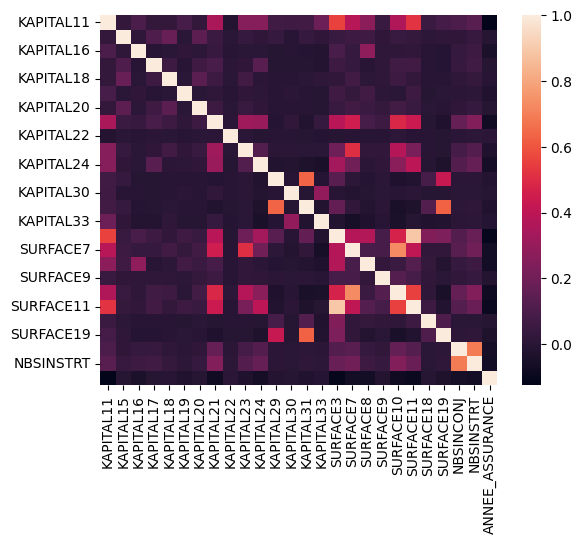

In [ ]:
sns.heatmap(X_continuous.corr())

In [ ]:
X_continuous.loc[:,'SURFACE3':'SURFACE11'].corr()

,SURFACE3,SURFACE7,SURFACE8,SURFACE9,SURFACE10,SURFACE11
SURFACE3,1.000000,0.380825,0.371411,0.084273,0.473354,0.890943
SURFACE7,0.380825,1.000000,0.093626,0.087681,0.731844,0.405852
SURFACE8,0.371411,0.093626,1.000000,0.026949,0.049803,0.125866
SURFACE9,0.084273,0.087681,0.026949,1.000000,0.123917,0.083940
SURFACE10,0.473354,0.731844,0.049803,0.123917,1.000000,0.549902
SURFACE11,0.890943,0.405852,0.125866,0.083940,0.549902,1.000000


<Axes: >

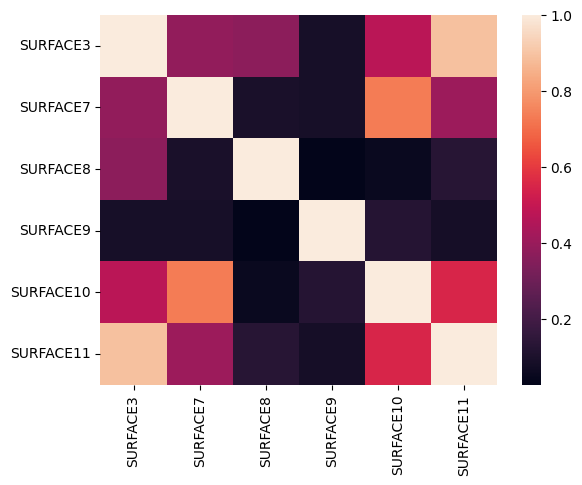

In [ ]:
sns.heatmap(X_continuous.loc[:,'SURFACE3':'SURFACE11'].corr())

¿Podemos hacer algo con las variables discretas?

In [ ]:
X_discrete = X.select_dtypes(include=['int'])
X_discrete

,CA1,CA2,CA3,KAPITAL1,KAPITAL2,KAPITAL3,KAPITAL4,KAPITAL5,KAPITAL6,KAPITAL7,...,NBBAT4,NBBAT5,NBBAT6,NBBAT7,NBBAT8,NBBAT9,NBBAT10,NBBAT11,NBBAT13,NBBAT14
0,0,0,0,0,0,0,0,0,1,0,...,8,0,0,0,0,3,0,0,8,0
1,0,0,0,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,3,0
2,30000,0,0,0,1,0,0,0,1,0,...,2,0,0,0,0,0,0,0,2,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383605,0,0,0,0,0,0,0,0,0,0,...,6,0,0,0,0,3,0,0,6,1
383606,4000,0,0,0,0,0,0,0,1,1,...,6,0,0,0,0,0,0,0,6,1
383607,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,2,0
383608,0,0,0,0,0,0,0,0,1,0,...,3,0,0,0,0,0,0,0,3,4


<Axes: >

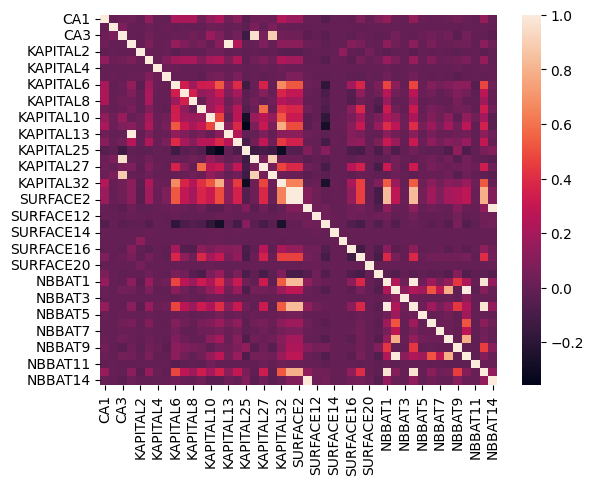

In [ ]:
sns.heatmap(X_discrete.corr(method='spearman'))

# Probabilidades de eventos solo viendo los valores de salida (train_output)

In [ ]:
train_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383610 entries, 0 to 383609
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               383610 non-null  int64  
 1   FREQ             383610 non-null  float64
 2   CM               383610 non-null  float64
 3   ANNEE_ASSURANCE  383610 non-null  float64
 4   CHARGE           383610 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 14.6 MB


In [ ]:
claim_counts = np.round(train_output['FREQ']*train_output['ANNEE_ASSURANCE'])
claim_counts.value_counts()

,count
0.0,380716
1.0,2791
2.0,99
3.0,2
5.0,1
4.0,1


¿Porqué obtenemos así el número de reclamaciones?

In [ ]:
# Respuesta





In [ ]:
train_output.describe()

,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
count,383610.000000,383610.000000,383610.000000,383610.000000,383610.000000
mean,191805.500000,0.012452,182.521632,0.701557,186.087058
std,110738.812719,0.357127,6699.967429,0.352375,6800.490328
min,1.000000,0.000000,-5751.000000,0.002732,-5751.000000
25%,95903.250000,0.000000,0.000000,0.389041,0.000000
50%,191805.500000,0.000000,0.000000,0.882192,0.000000
75%,287707.750000,0.000000,0.000000,1.000000,0.000000
max,383610.000000,182.499998,500000.000000,2.000000,552000.000000


Explicaremos a detalle el código a continuación

In [ ]:
claim_counts = np.round(train_output['FREQ']*train_output['ANNEE_ASSURANCE'])

periods = 12 #months

freq_exposure = pd.DataFrame({
    'ClaimNb': claim_counts,
    'Exposure': np.ceil((train_input['ANNEE_ASSURANCE'] * periods)).astype(int)   # Multiply by 12 and round
})

agg_func1 = {'ClaimNb': ['count', 'sum', 'max', 'mean', 'var' ,('has_claim', lambda x: (x > 0).sum() )]}

freq_exposure = freq_exposure.groupby(by='Exposure',observed=True).agg(agg_func1).reset_index()
freq_exposure.columns = [col[1] if col[0] == 'ClaimNb' else col[0] for col in freq_exposure.columns]

# Frequency
freq_exposure['freq'] = freq_exposure['sum'] / freq_exposure['count']

# "Porbability" of at least 1 claim
freq_exposure['prob_claim'] = freq_exposure['has_claim'] / freq_exposure['count']

freq_exposure['prob_claim_poisson'] = 1 - np.exp(-freq_exposure['freq'])

# Normalized by exposure
freq_exposure['freq_over_exposure'] = freq_exposure['freq'] * periods/freq_exposure['Exposure']

# Dispersion (to check viability of indepence / Poisosn assumption
freq_exposure['dispersion'] = freq_exposure['freq'] / freq_exposure['var']

freq_exposure


,Exposure,count,sum,max,mean,var,has_claim,freq,prob_claim,prob_claim_poisson,freq_over_exposure,dispersion
0,1,17431,15.0,1.0,0.000861,0.000860,15,0.000861,0.000861,0.000860,0.010326,1.000804
1,2,27887,32.0,1.0,0.001147,0.001146,32,0.001147,0.001147,0.001147,0.006885,1.001113
2,3,22539,63.0,2.0,0.002795,0.002965,61,0.002795,0.002706,0.002791,0.011181,0.942735
3,4,19650,75.0,2.0,0.003817,0.003904,74,0.003817,0.003766,0.003810,0.011450,0.977611
4,5,15266,77.0,2.0,0.005044,0.005281,75,0.005044,0.004913,0.005031,0.012105,0.955135
5,6,17600,114.0,2.0,0.006477,0.006777,111,0.006477,0.006307,0.006456,0.012955,0.955828
6,7,17584,195.0,2.0,0.011090,0.011763,188,0.011090,0.010692,0.011028,0.019011,0.942715
7,8,13433,163.0,2.0,0.012134,0.012584,159,0.012134,0.011837,0.012061,0.018201,0.964299
8,9,15921,207.0,2.0,0.013002,0.013713,200,0.013002,0.012562,0.012918,0.017336,0.948139
9,10,16407,170.0,2.0,0.010361,0.010986,164,0.010361,0.009996,0.010308,0.012434,0.943137


"ANNEE_ASSURANCE" denotes the fraction of the year for which there was insurance. Sometimes referred to as "exposure".

# Visualizacion del Histograma de "Exposure"

<Axes: >

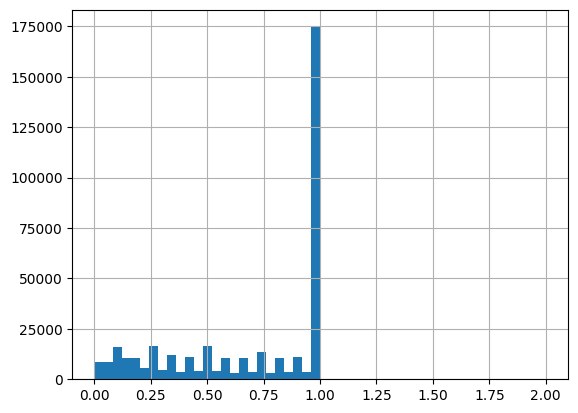

In [ ]:
(train_input['ANNEE_ASSURANCE']).hist(bins=50)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Count'>

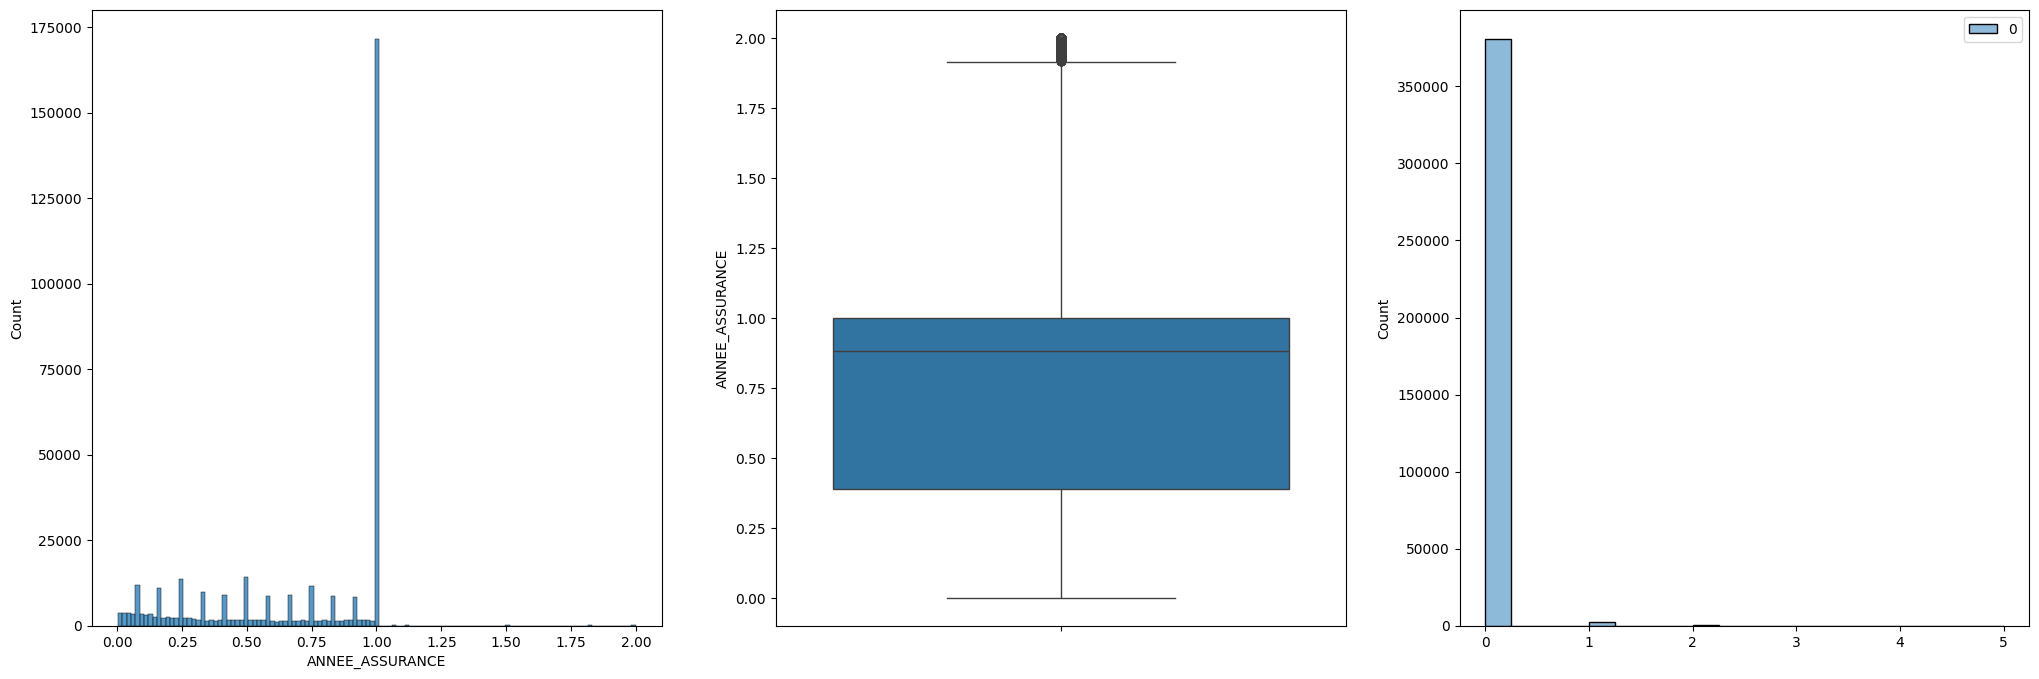

In [ ]:
plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
plt.subplot(1, 3, 1)
sns.histplot(train_output, x='ANNEE_ASSURANCE')
plt.subplot(1, 3, 2)
sns.boxplot(y="ANNEE_ASSURANCE", data=train_output)
plt.subplot(1, 3, 3)
sns.histplot(pd.DataFrame(np.ceil(train_output['FREQ']*train_output['ANNEE_ASSURANCE'])))

In [ ]:
all_data = pd.concat([X.drop(columns=['ANNEE_ASSURANCE']), train_output], axis=1)
all_data

,TYPERS,ANCIENNETE,CARACT2,DUREE_REQANEUF,CARACT5,TYPBAT2,DEROG15,CA1,CA2,CA3,...,EQUIPEMENT4,EQUIPEMENT6,EQUIPEMENT7,ZONE_VENT,ZONE,ID,FREQ,CM,ANNEE_ASSURANCE,CHARGE
0,1,0,0.0,0.0,0,0,100.0,0,0,0,...,1,9,10,2.0,3,1,0.0,0.0,1.000000,0.0
1,1,0,0.0,0.0,0,0,100.0,0,0,0,...,1,9,10,2.0,3,2,0.0,0.0,1.000000,0.0
2,1,2,0.0,0.0,0,0,100.0,30000,0,0,...,1,8,9,2.0,3,3,0.0,0.0,0.402740,0.0
3,2,0,0.0,0.0,0,0,100.0,0,0,0,...,1,2,3,2.0,3,4,0.0,0.0,0.246575,0.0
4,2,1,0.0,0.0,0,0,100.0,0,0,0,...,1,7,8,1.0,3,5,0.0,0.0,0.838356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383605,2,5,0.0,2.0,0,0,100.0,0,0,0,...,1,2,3,2.0,95,383606,0.0,0.0,1.000000,0.0
383606,2,11,0.0,2.0,0,1,100.0,4000,0,0,...,1,20,21,2.0,95,383607,0.0,0.0,1.000000,0.0
383607,1,10,0.0,2.0,0,0,100.0,0,0,0,...,1,7,8,2.0,95,383608,0.0,0.0,1.000000,0.0
383608,2,0,0.0,2.0,0,1,100.0,0,0,0,...,1,4,5,2.0,95,383609,0.0,0.0,1.000000,0.0


# Visualización de como se distribuye alguna variable objetivo respecto a alguna de las características de entrada (en este caso es el EXPOSURE respecto a la variable "ZONE_VENT"). Puede utilizarse cualquier otro par para intentar ver relaciones

<Axes: xlabel='ANNEE_ASSURANCE', ylabel='Count'>

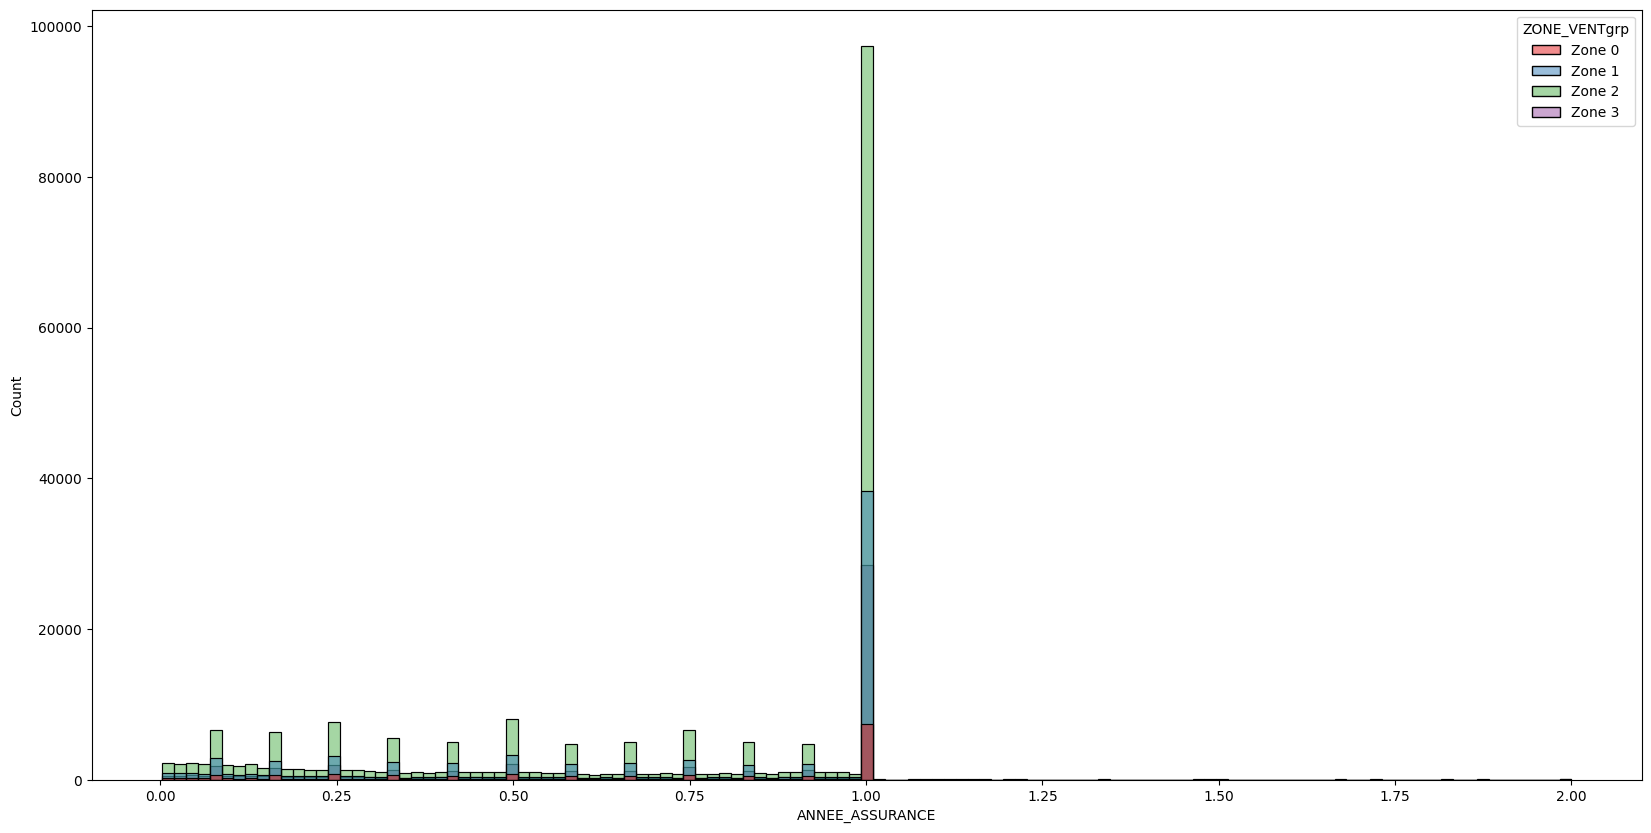

In [ ]:
bins = [-0.5, 0.5, 1.5, 2.5, 3.5] # Modificar dependiendo de los rangos de las variables
labels = ['Zone 0', 'Zone 1', 'Zone 2', 'Zone 3'] # Modificar, debe ser 1 menos que los bins
all_data['ZONE_VENTgrp'] = pd.cut(all_data['ZONE_VENT'], bins=bins, labels=labels)
plt.figure(figsize=(20, 10))
sns.histplot(all_data, x='ANNEE_ASSURANCE', hue='ZONE_VENTgrp', palette='Set1')

In [ ]:
X.columns

Index(['TYPERS', 'ANCIENNETE', 'CARACT2', 'DUREE_REQANEUF', 'CARACT5',
       'TYPBAT2', 'DEROG15', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2',
       'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8',
       'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13',
       'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18',
       'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23',
       'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28',
       'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33',
       'SURFACE1', 'SURFACE2', 'SURFACE3', 'SURFACE5', 'SURFACE7', 'SURFACE8',
       'SURFACE9', 'SURFACE10', 'SURFACE11', 'SURFACE12', 'SURFACE13',
       'SURFACE14', 'SURFACE15', 'SURFACE16', 'SURFACE17', 'SURFACE18',
       'SURFACE19', 'SURFACE20', 'SURFACE21', 'NBBAT1', 'NBBAT2', 'NBBAT3',
       'NBBAT4', 'NBBAT5', 'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBBAT10',
       'NBBAT11', 'NBBAT13', 'NBBAT14', '

In [ ]:
all_data.ZONE_VENT.value_counts()

,count
ZONE_VENT,
2.0,218973
1.0,86592
3.0,59463
0.0,18582


# Boxplot de una variable por clases

<Axes: xlabel='RISK2', ylabel='ANNEE_ASSURANCE'>

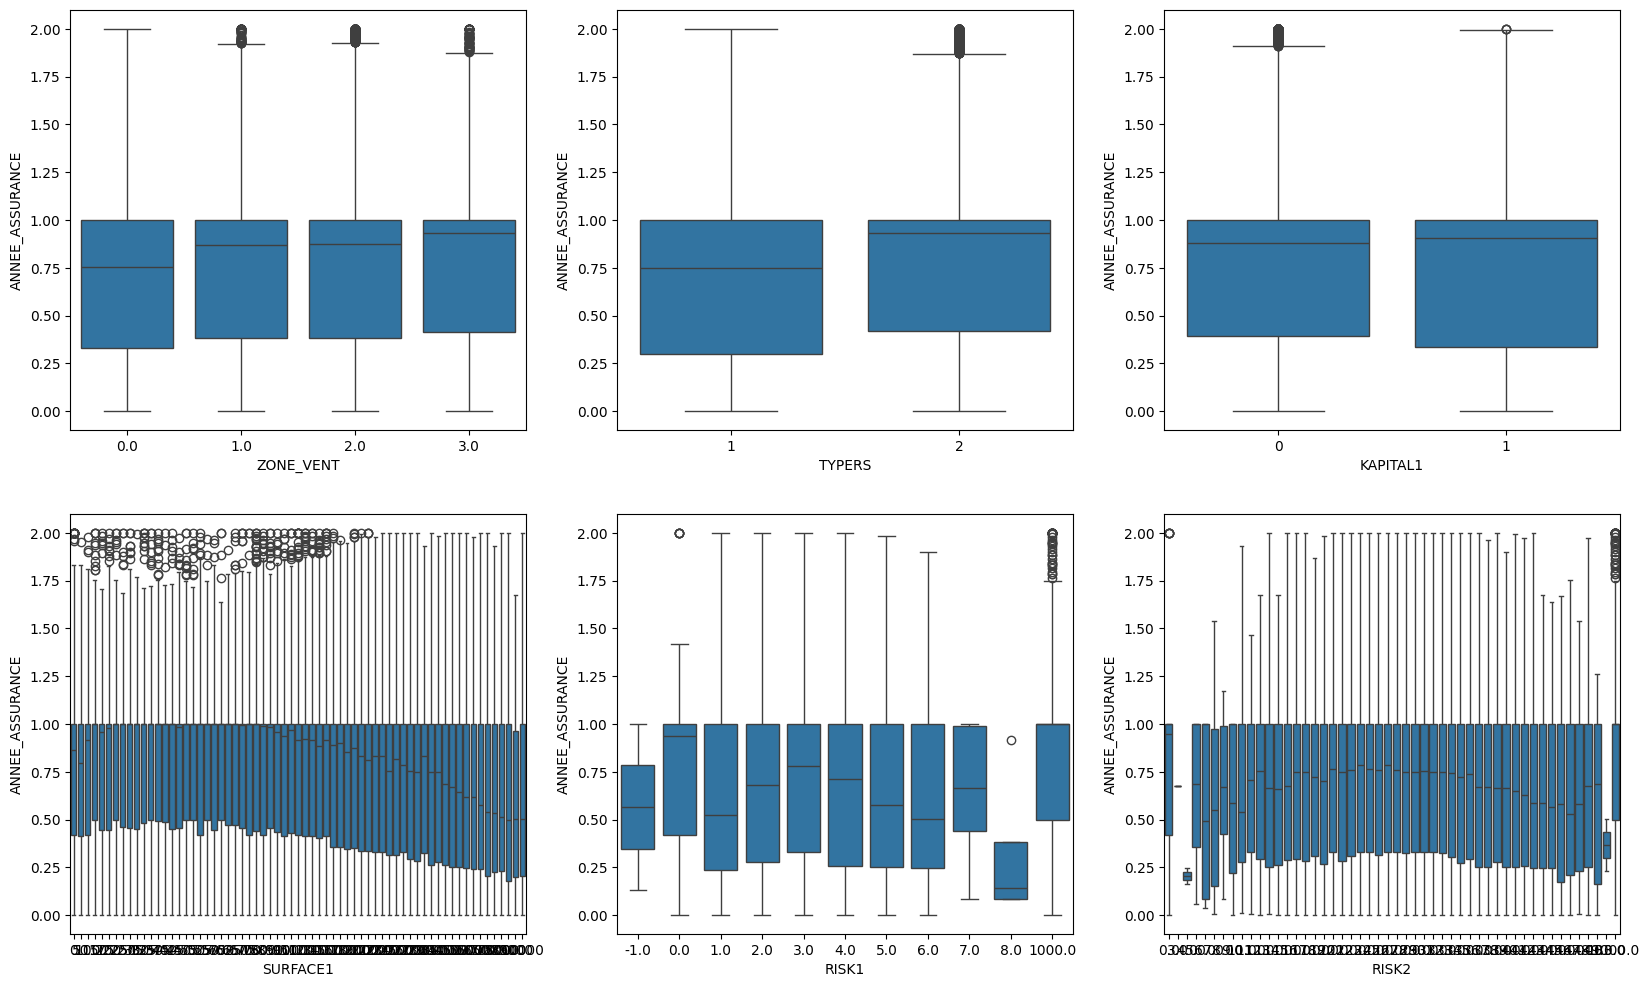

In [ ]:
plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
plt.subplot(2, 3, 1)
sns.boxplot(y='ANNEE_ASSURANCE', x='ZONE_VENT', data=all_data)
plt.subplot(2, 3, 2)
sns.boxplot(y='ANNEE_ASSURANCE', x='TYPERS', data=all_data)
plt.subplot(2, 3, 3)
sns.boxplot(y='ANNEE_ASSURANCE', x='KAPITAL1', data=all_data)
plt.subplot(2, 3, 4)
sns.boxplot(y='ANNEE_ASSURANCE', x='SURFACE1', data=all_data)
plt.subplot(2, 3, 5)
sns.boxplot(y='ANNEE_ASSURANCE', x='RISK1', data=all_data)
plt.subplot(2, 3, 6)
sns.boxplot(y='ANNEE_ASSURANCE', x='RISK2', data=all_data)

# Visualizaciones para ver la importancia importancia de características para predecir Frecuencia, y que tipo de relación pudieran tener

In [ ]:
all_data['ClaimNb'] =  np.round(train_output['FREQ']*train_output['ANNEE_ASSURANCE'])

In [ ]:
# Portfolio frequency
p_freq = sum(all_data['ClaimNb']) / sum(all_data['ANNEE_ASSURANCE'])
print(p_freq)

0.011162132244195799


In [ ]:
def runmultiplot(data, dimension):
    """
    :param data: should be df_freq
    :param dimension: dimension to use
    :return: multiplots
    """
    agg_func1 = {'ClaimNb': ['sum'], 'ANNEE_ASSURANCE': ['sum']}
    temp1 = data.groupby(by=[dimension],observed=True).agg(agg_func1).reset_index()
    temp1['MarginalFreq'] = temp1[('ClaimNb', 'sum')] / temp1[('ANNEE_ASSURANCE', 'sum')]
    temp1['ClaimNbGrp'] = temp1[('ClaimNb', 'sum')]
    temp1['ExposureGrp'] = temp1[('ANNEE_ASSURANCE', 'sum')]
    temp1['Stdv'] = np.sqrt(temp1['ClaimNbGrp']) / temp1['ExposureGrp']
    temp1['PortfolioFreq'] = p_freq
    temp1['Rank'] = temp1[dimension].rank(method='dense') - 1
    # the reason why we need this additional Rank step
    # https://stackoverflow.com/questions/64402358/seaborn-lineplot-and-barplot-dont-align-in-the-x-axis
    # barplot does not plot at actual x values. It treats x variables as categorical.
    # whereas a lineplot uses the actual x values
    # two options:
    # 1. use pointplot instead
    # 2. use rank and keep lineplot

    fig, ax1 = plt.subplots(figsize=(20, 13))
    sns.barplot(x=dimension, y='ExposureGrp', data=temp1,
                estimator=sum, order=sorted(temp1[dimension].unique()), alpha=0.7, ax=ax1)
    ax1.bar_label(ax1.containers[0]) # add value to the bar
    ax1.set_xticks(range(len(sorted(temp1[dimension].unique()))))
    ax1.set_xticklabels(sorted(temp1[dimension].unique()))
    ax2 = ax1.twinx() # share x axis
    sns.lineplot(x='Rank', y='MarginalFreq', data=temp1,
                 label=dimension, marker='o', markersize=14, ax=ax2)
    nstdv = 1
    for nstdv in range(1, 4):
        ax2.fill_between(temp1['Rank'],
                         (temp1['MarginalFreq'] - nstdv * temp1['Stdv']),
                         (temp1['MarginalFreq'] + nstdv * temp1['Stdv']),
                         alpha=0.25,
                         label='nstd={}'.format(nstdv))
    ax2.legend(loc='upper left')
    ax2.set_yticklabels([])
    ax3 = ax2.twinx()
    sns.lineplot(x='Rank', y='PortfolioFreq', data=temp1,
                 label='Portfolio', marker='o', markersize=14, color='red', ax=ax3)
    plt.title('Freq by ' + dimension + ' vs Portfolio Freq')

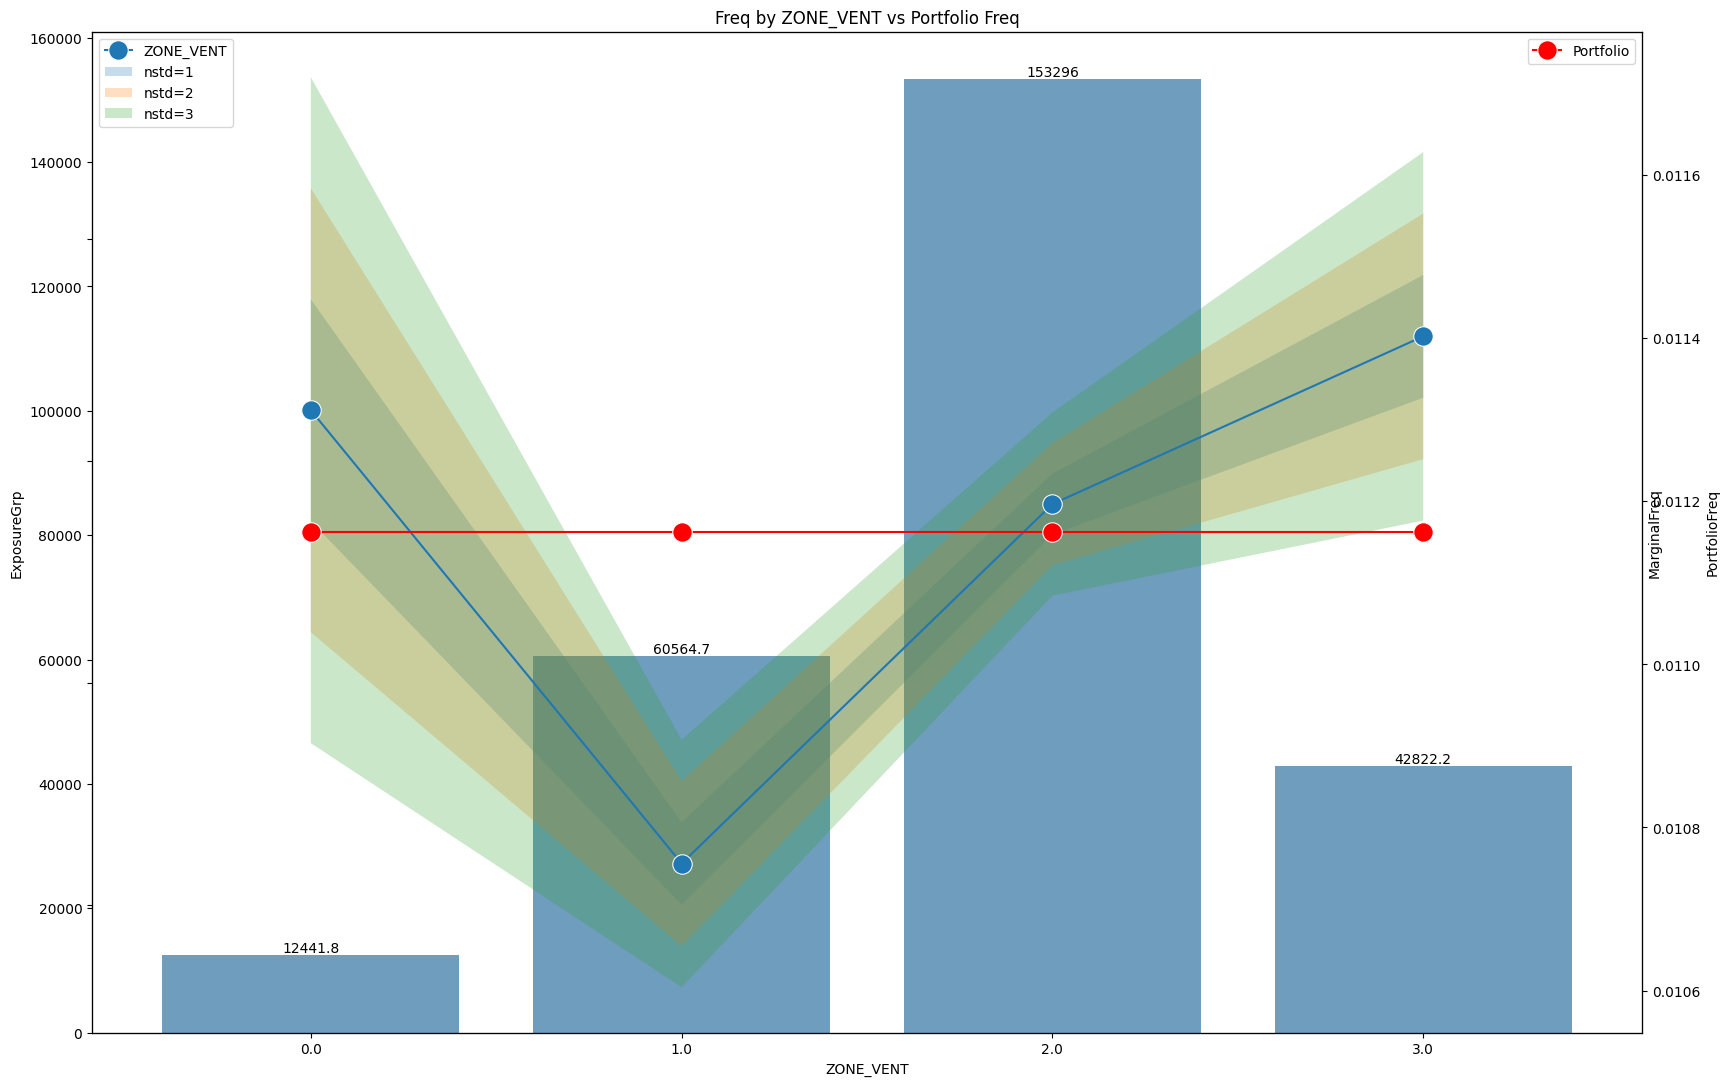

In [ ]:
runmultiplot(all_data, 'ZONE_VENT')

In [ ]:
all_data.columns

Index(['TYPERS', 'ANCIENNETE', 'CARACT2', 'DUREE_REQANEUF', 'CARACT5',
       'TYPBAT2', 'DEROG15', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2',
       'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8',
       'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13',
       'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18',
       'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23',
       'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28',
       'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33',
       'SURFACE1', 'SURFACE2', 'SURFACE3', 'SURFACE5', 'SURFACE7', 'SURFACE8',
       'SURFACE9', 'SURFACE10', 'SURFACE11', 'SURFACE12', 'SURFACE13',
       'SURFACE14', 'SURFACE15', 'SURFACE16', 'SURFACE17', 'SURFACE18',
       'SURFACE19', 'SURFACE20', 'SURFACE21', 'NBBAT1', 'NBBAT2', 'NBBAT3',
       'NBBAT4', 'NBBAT5', 'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBBAT10',
       'NBBAT11', 'NBBAT13', 'NBBAT14', '

# GLM: Poisson para Ocurrencia de evento

La ocurrencia viene de:

**train_output['FREQ'] x train_output['ANNEE_ASSURANCE']**

Usaré varias variables para predecirlo. Pueden cambiarlas al gusto

Fórmula para modelo Poisson:

$$ Y = e^{\beta_0 + \beta_1 \times X_1 + \ldots + \beta_n \times X_n} $$

In [ ]:
import statsmodels.api as sm
import statsmodels
from sklearn.model_selection import train_test_split

In [ ]:
X

,TYPERS,ANCIENNETE,CARACT2,DUREE_REQANEUF,CARACT5,TYPBAT2,DEROG15,CA1,CA2,CA3,...,RISK5,RISK7,EQUIPEMENT1,EQUIPEMENT3,EQUIPEMENT4,EQUIPEMENT6,EQUIPEMENT7,ZONE_VENT,ANNEE_ASSURANCE,ZONE
0,1,0,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,9,10,2.0,1.000000,3
1,1,0,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,9,10,2.0,1.000000,3
2,1,2,0.0,0.0,0,0,100.0,30000,0,0,...,0.0,0.0,0,0,1,8,9,2.0,0.402740,3
3,2,0,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,2,3,2.0,0.246575,3
4,2,1,0.0,0.0,0,0,100.0,0,0,0,...,0.0,0.0,0,0,1,7,8,1.0,0.838356,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383605,2,5,0.0,2.0,0,0,100.0,0,0,0,...,4.0,90.0,0,0,1,2,3,2.0,1.000000,95
383606,2,11,0.0,2.0,0,1,100.0,4000,0,0,...,5.0,95.0,0,1,1,20,21,2.0,1.000000,95
383607,1,10,0.0,2.0,0,0,100.0,0,0,0,...,4.0,100.0,0,0,1,7,8,2.0,1.000000,95
383608,2,0,0.0,2.0,0,1,100.0,0,0,0,...,5.0,100.0,0,0,1,4,5,2.0,1.000000,95


In [ ]:
y = train_output['FREQ']*train_output['ANNEE_ASSURANCE'].copy()
y

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
383605,0.0
383606,0.0
383607,0.0
383608,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['TYPERS', 'ANCIENNETE', 'CARACT2', 'DUREE_REQANEUF', 'CARACT5',
       'TYPBAT2', 'DEROG15', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2',
       'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8',
       'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13',
       'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18',
       'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23',
       'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28',
       'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33',
       'SURFACE1', 'SURFACE2', 'SURFACE3', 'SURFACE5', 'SURFACE7', 'SURFACE8',
       'SURFACE9', 'SURFACE10', 'SURFACE11', 'SURFACE12', 'SURFACE13',
       'SURFACE14', 'SURFACE15', 'SURFACE16', 'SURFACE17', 'SURFACE18',
       'SURFACE19', 'SURFACE20', 'SURFACE21', 'NBBAT1', 'NBBAT2', 'NBBAT3',
       'NBBAT4', 'NBBAT5', 'NBBAT6', 'NBBAT7', 'NBBAT8', 'NBBAT9', 'NBBAT10',
       'NBBAT11', 'NBBAT13', 'NBBAT14', '

Documentación para modelo Poisson: https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Poisson.html

In [ ]:
X_poisson = sm.add_constant(X_train[['ZONE_VENT', 'RISK1', 'RISK2', 'RISK3', 'RISK4', 'RISK5', 'RISK7']])

In [ ]:
model_no_indicators = statsmodels.discrete.discrete_model.Poisson(
    y_train,
    X_poisson
)
result_no_indicators = model_no_indicators.fit()
print(result_no_indicators.summary())

Optimization terminated successfully.
         Current function value: 0.046016
         Iterations 10
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:               306888
Model:                        Poisson   Df Residuals:                   306880
Method:                           MLE   Df Model:                            7
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                0.004483
Time:                        18:20:37   Log-Likelihood:                -14122.
converged:                       True   LL-Null:                       -14185.
Covariance Type:            nonrobust   LLR p-value:                 2.438e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7830      0.084    -57.134      0.000      -4.947      -4.619
ZONE_VENT      0.1549      0

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
X_glm = sm.add_constant(X_train[['ZONE_VENT', 'RISK1', 'RISK2', 'RISK3', 'RISK4', 'RISK5', 'RISK7']])

# Fit the Poisson regression model
glm_model = sm.GLM(y_train, X_glm, family=sm.families.Poisson())
glm_results = glm_model.fit()

In [ ]:
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      0   No. Observations:               306888
Model:                            GLM   Df Residuals:                   306880
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14122.
Date:                Tue, 18 Mar 2025   Deviance:                       23536.
Time:                        18:22:13   Pearson chi2:                 3.29e+05
No. Iterations:                     8   Pseudo R-squ. (CS):          0.0004143
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7830      0.084    -57.134      0.000      -4.947      -4.619
ZONE_VENT      0.1549      0.028      5.485      0.000       0.100       0.210
RISK1         -0.0268      0.037     -0.720      0.471      -0.100       0.046
RISK2         -0.0151      0.012     -1.312      0.190      -0.038       0.007
RISK3          0.0340      0.020      1.698      0.090      -0.005       0.073
RISK4          0.0983      0.027      3.696      0.000       0.046       0.150
RISK5         -0.0909      0.023     -4.015      0.000      -0.135      -0.047
RISK7         -0.0005      0.003     -0.185      0.853      -0.006       0.005
==============================================================================
"""

## Ejercicio:
¿Cómo harían la predicción para un caso especifico? Tome 10 filas del DataFrame de datos "X_test" y haga predicción para esos 10

In [ ]:
# Espacio para código de ejercicio:







